# Прогноз цены автомобиля 

- Файл с данными: `CarPrice_Assignment.csv` в папке проекта.

In [54]:
# Ячейка 2: Импорты и настройки
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

pd.options.display.max_columns = None
RANDOM_STATE = 42
sns.set(style='whitegrid')
print('Импорты завершены')

Импорты завершены


In [55]:
# Ячейка 3: Загрузка данных
DATA_PATH = './CarPrice_Assignment.csv'  # файл в корне проекта
if not os.path.exists(DATA_PATH):
    print(f'Файл {DATA_PATH} не найден. Убедитесь, что `CarPrice_Assignment.csv` лежит в папке проекта.')
else:
    df = pd.read_csv(DATA_PATH)
    print('Размер датасета:', df.shape)
    display(df.head())
    print('\nИнформация по столбцам:')
    display(df.info())
    print('\nСтатистика по числовым признакам:')
    display(df.describe())
    print('\nПропуски по столбцам:')
    display(df.isnull().sum().sort_values(ascending=False))

Размер датасета: (205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0



Информация по столбцам:
<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    str    
 3   fueltype          205 non-null    str    
 4   aspiration        205 non-null    str    
 5   doornumber        205 non-null    str    
 6   carbody           205 non-null    str    
 7   drivewheel        205 non-null    str    
 8   enginelocation    205 non-null    str    
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    str    
 15  cylindernumber    205 non-null    str    
 16  enginesize        205 non-null

None


Статистика по числовым признакам:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



Пропуски по столбцам:


car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64

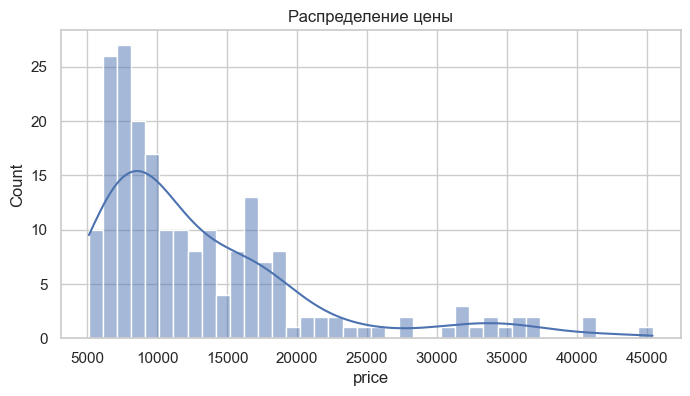

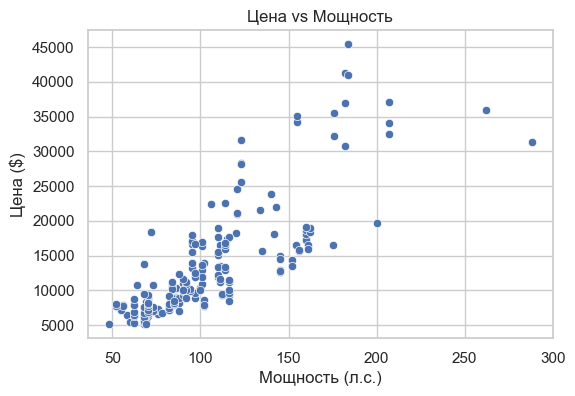

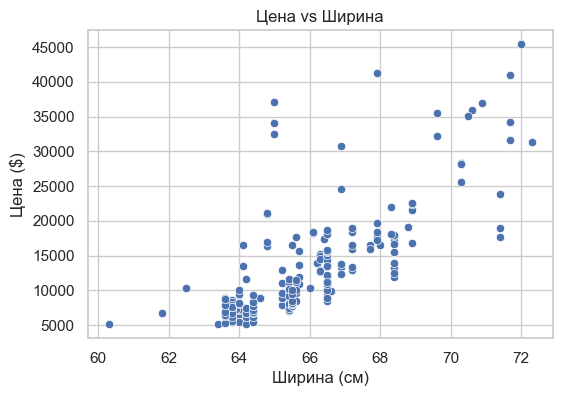

In [56]:
# Ячейка 4: Быстрая визуализация
if 'df' in globals():
    if 'price' in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df['price'], bins=40, kde=True)
        plt.title('Распределение цены')
        plt.show()

    if 'horsepower' in df.columns and 'price' in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='horsepower', y='price', data=df)
        plt.xlabel('Мощность (л.с.)')
        plt.ylabel('Цена ($)')
        plt.title('Цена vs Мощность')
        plt.show()

    if 'carwidth' in df.columns and 'price' in df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x='carwidth', y='price', data=df)
        plt.xlabel('Ширина (см)')
        plt.ylabel('Цена ($)')
        plt.title('Цена vs Ширина')
        plt.show()
else:
    print('Датасет не загружен — выполните ячейку загрузки данных.')

## Предобработка данных
- Очистим имена брендов (`CarName`), выделим `brand`.
- Преобразуем категориальные признаки, заполним пропуски простыми стратегиями.
- Подготовим набор признаков для модели.

In [57]:
# Ячейка 6: Предобработка
if 'df' in globals():
    data = df.copy()
    # выделим бренд из CarName (первое слово)
    if 'CarName' in data.columns:
        data['brand'] = data['CarName'].apply(lambda x: str(x).split()[0].lower())
    # удалим дубликаты и ненужные столбцы
    if 'car_ID' in data.columns:
        data.drop(columns=['car_ID'], inplace=True)
    if 'CarName' in data.columns:
        data.drop(columns=['CarName'], inplace=True)

    # преобразования типов: некоторые числовые могут быть строкой
    # простая стратегия заполнения
    num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
    cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
    if 'price' in num_cols:
        num_cols.remove('price')

    for c in num_cols:
        data[c].fillna(data[c].median(), inplace=True)
    for c in cat_cols:
        data[c].fillna('missing', inplace=True)

    print('Числовые признаки:', num_cols)
    print('Категориальные признаки:', cat_cols)
else:
    print('Датасет не загружен')

Числовые признаки: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
Категориальные признаки: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']


C:\Users\User\AppData\Local\Temp\ipykernel_18780\2788010043.py:16: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = data.select_dtypes(include=['object','category']).columns.tolist()
C:\Users\User\AppData\Local\Temp\ipykernel_18780\2788010043.py:21: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).



## Модель и pipeline
- Соберём `ColumnTransformer` с StandardScaler для чисел и OneHotEncoder для категорий.
- Обучим `RandomForestRegressor` и оценим RMSE и R2 на валидации.

In [58]:
# Ячейка 8: Построение pipeline и обучение
if 'data' in globals() and 'price' in data.columns:
    features = []
    # возьмём некоторые числовые признаки и brand
    num_feats = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','peakrpm','citympg','highwaympg']
    num_feats = [f for f in num_feats if f in data.columns]
    cat_feats = ['brand','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']
    cat_feats = [f for f in cat_feats if f in data.columns]
    features = num_feats + cat_feats
    print('Используем признаки:', features)

    X = data[features]
    y = data['price']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_feats)
    ])

    model = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
    pipe = Pipeline([('preproc', preprocessor), ('model', model)])

    start = time.time()
    pipe.fit(X_train, y_train)
    elapsed = time.time() - start
    print(f'Время обучения: {elapsed:.1f} сек')

    preds = pipe.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, preds)
    print(f'RMSE: {rmse:.2f}, R2: {r2:.3f}')
else:
    print('Данные не подготовлены или нет столбца price')

Используем признаки: ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']
Время обучения: 0.2 сек
RMSE: 1821.47, R2: 0.958


In [59]:
# Ячейка 9: Сохранение модели и предсказаний
models_dir = './models'
os.makedirs(models_dir, exist_ok=True)
if 'pipe' in globals():
    model_path = os.path.join(models_dir, 'rf_car_price.joblib')
    joblib.dump(pipe, model_path)
    print('Модель сохранена в', model_path)

    # Сохраним предсказания на валидации
    preds_df = X_val.copy()
    preds_df['y_true'] = y_val.values
    preds_df['y_pred'] = preds
    preds_df.to_csv(os.path.join(models_dir, 'val_predictions.csv'), index=False)
    print('Предсказания сохранены в', os.path.join(models_dir, 'val_predictions.csv'))
else:
    print('Модель отсутствует — ничего не сохраняю')

Модель сохранена в ./models\rf_car_price.joblib
Предсказания сохранены в ./models\val_predictions.csv


## Заключение и репродуцируемость
- Модель: `RandomForestRegressor` (пример). Для улучшения — кросс-валидация, подбор гиперпараметров, больше фичей.
- Для повторения: убедитесь, что `CarPrice_Assignment.csv` лежит в корне проекта, затем запустите ячейки сверху вниз.

Файл зависимостей `requirements.txt` будет создан автоматически при запуске последней ячейки.

In [60]:
# Ячейка 11: requirements.txt пример
with open('requirements.txt', 'w', encoding='utf8') as f:
    f.write('pandas\nnumpy\nscikit-learn\nmatplotlib\nseaborn\njoblib\n')
print('requirements.txt создан')

requirements.txt создан


## Презентация статистики и визуализации
Ниже — расширенная секция статистики и визуализаций: сводные таблицы, распределения, матрица корреляций, ящики с усами и violin-плоты, а также важности признаков (если модель обучена). Графики сохраняются в папку `./figures/`.

In [61]:
# Ячейка: Расширенные сводные статистики
import scipy.stats as stats

if 'data' in globals():
    stats_df = data.copy()
    # базовые describe + дополнительные перцентели
    num = stats_df.select_dtypes(include=['number'])
    desc = num.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
    desc['skew'] = num.skew()
    desc['kurtosis'] = num.kurtosis()
    desc['missing'] = stats_df.isnull().sum()
    desc['unique'] = stats_df.nunique()
    display(desc.sort_values('median' if 'median' in desc.columns else '50%'))

    # дубликаты
    print('Дубликатов строк:', stats_df.duplicated().sum())

    # частотные распределения для ключевых категорий
    cat_cols = stats_df.select_dtypes(include=['object','category']).columns.tolist()
    for c in ['brand','carbody','drivewheel']:
        if c in stats_df.columns:
            print(f"\nТоп-10 по {c} (count, mean price):")
            tmp = stats_df.groupby(c)['price'].agg(['count','mean']).sort_values('count', ascending=False).head(10)
            display(tmp)
else:
    print('Данные не подготовлены — выполните ячейку предобработки.')

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,skew,kurtosis,missing,unique
symboling,205.0,0.834146,1.245307,-2.00,-1.9600,-1.00,0.00,1.00,2.00,3.00,3.000,3.00,0.211072,-0.676271,0,6
stroke,205.0,3.255415,0.313597,2.07,2.1968,2.64,3.11,3.29,3.41,3.64,3.900,4.17,-0.689705,2.174396,0,37
boreratio,205.0,3.329756,0.270844,2.54,2.9100,2.97,3.15,3.31,3.58,3.78,3.800,3.94,0.020156,-0.785042,0,38
compressionratio,205.0,10.142537,3.972040,7.00,7.0000,7.50,8.60,9.00,9.40,21.82,23.000,23.00,2.610862,5.233054,0,32
citympg,205.0,25.219512,6.542142,13.00,14.0400,16.00,19.00,24.00,30.00,37.00,44.720,49.00,0.663704,0.578648,0,29
highwaympg,205.0,30.751220,6.886443,16.00,17.0400,22.00,25.00,30.00,34.00,42.80,49.880,54.00,0.539997,0.440070,0,30
carheight,205.0,53.724878,2.443522,47.80,48.8240,49.70,52.00,54.10,55.50,57.50,59.100,59.80,0.063123,-0.443812,0,49
carwidth,205.0,65.907805,2.145204,60.30,62.5360,63.60,64.10,65.50,66.90,70.46,71.700,72.30,0.904003,0.702764,0,44
horsepower,205.0,104.117073,39.544167,48.00,52.1200,62.00,70.00,95.00,116.00,180.80,207.000,288.00,1.405310,2.684006,0,59
wheelbase,205.0,98.756585,6.021776,86.60,88.4080,93.02,94.50,97.00,102.40,110.00,115.544,120.90,1.050214,1.017039,0,53


Дубликатов строк: 0

Топ-10 по brand (count, mean price):


C:\Users\User\AppData\Local\Temp\ipykernel_18780\2688234685.py:19: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = stats_df.select_dtypes(include=['object','category']).columns.tolist()


,count,mean
brand,,
toyota,31,9696.645161
nissan,18,10415.666667
mazda,15,11320.600000
mitsubishi,13,9239.769231
honda,13,8184.692308
subaru,12,8541.250000
peugeot,11,15489.090909
volvo,11,18063.181818
volkswagen,9,10175.555556



Топ-10 по carbody (count, mean price):


,count,mean
carbody,,
sedan,96,14344.270833
hatchback,70,10376.652386
wagon,25,12371.960000
hardtop,8,22208.500000
convertible,6,21890.500000



Топ-10 по drivewheel (count, mean price):


,count,mean
drivewheel,,
fwd,120,9239.308333
rwd,76,19910.809211
4wd,9,11087.463000


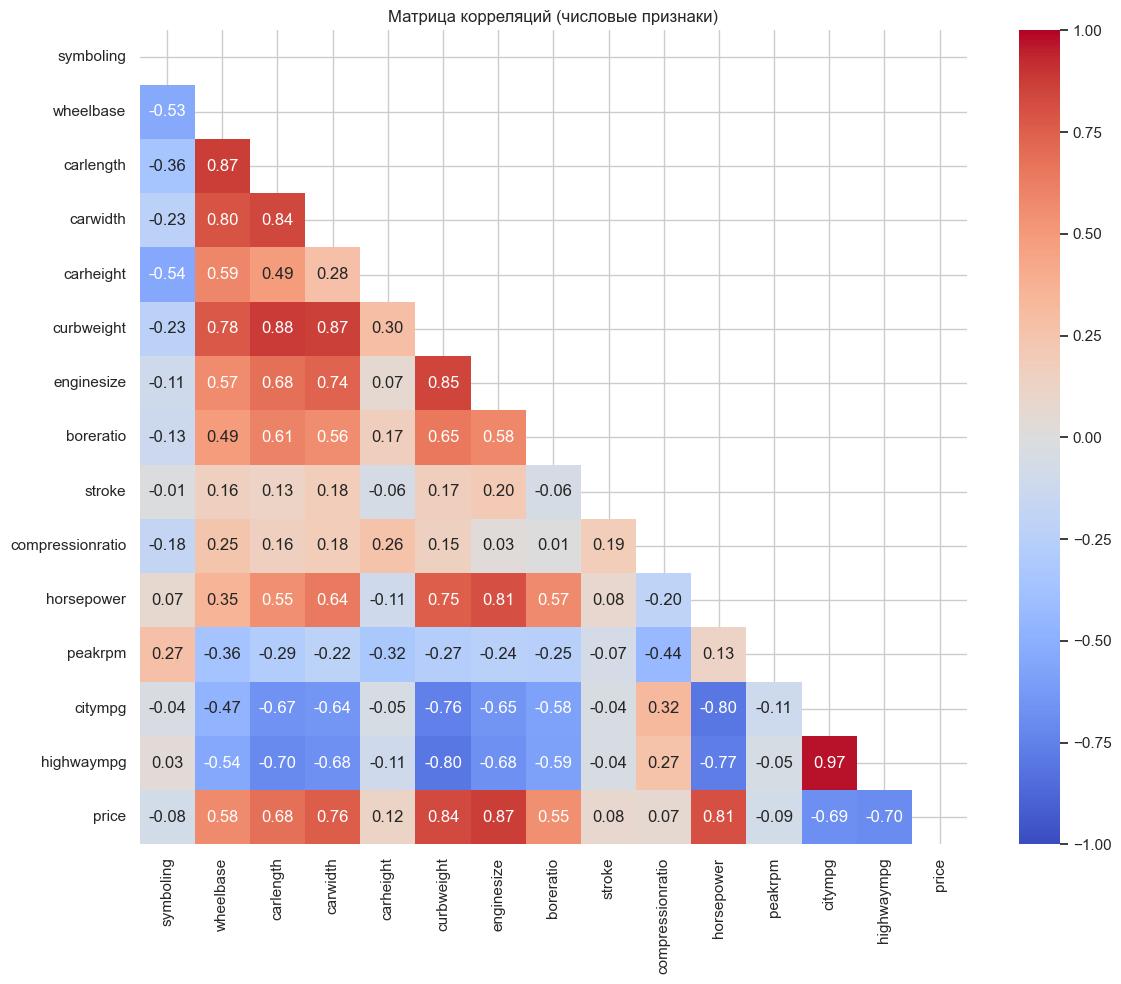

In [62]:
# Ячейка: Матрица корреляций (визуально)
import os
fig_dir = './figures'
os.makedirs(fig_dir, exist_ok=True)

if 'data' in globals():
    num = data.select_dtypes(include=['number']).copy()
    if 'price' in num.columns:
        corr = num.corr()
        plt.figure(figsize=(12,10))
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Матрица корреляций (числовые признаки)')
        plt.tight_layout()
        plt.savefig(os.path.join(fig_dir, 'correlation_matrix.png'), dpi=150)
        plt.show()
    else:
        print('В данных нет числовых признаков с price')
else:
    print('Данные не подготовлены')

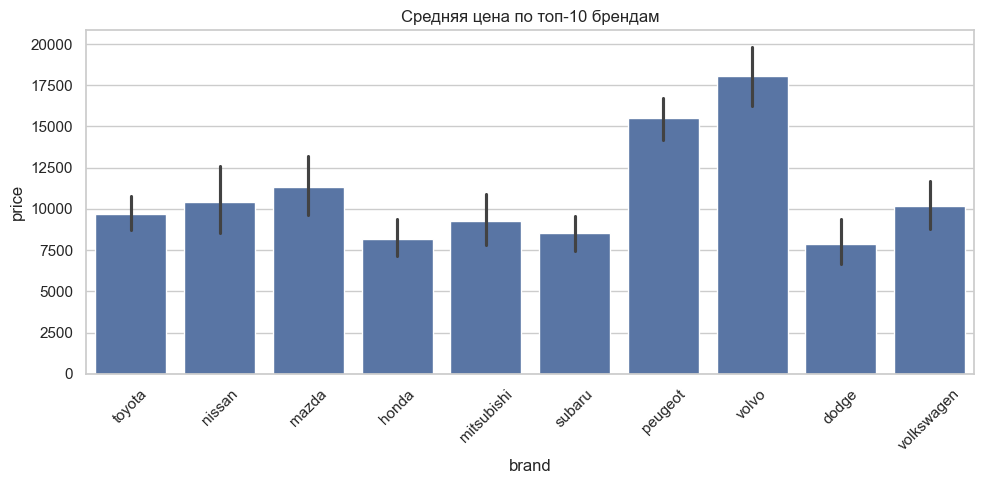

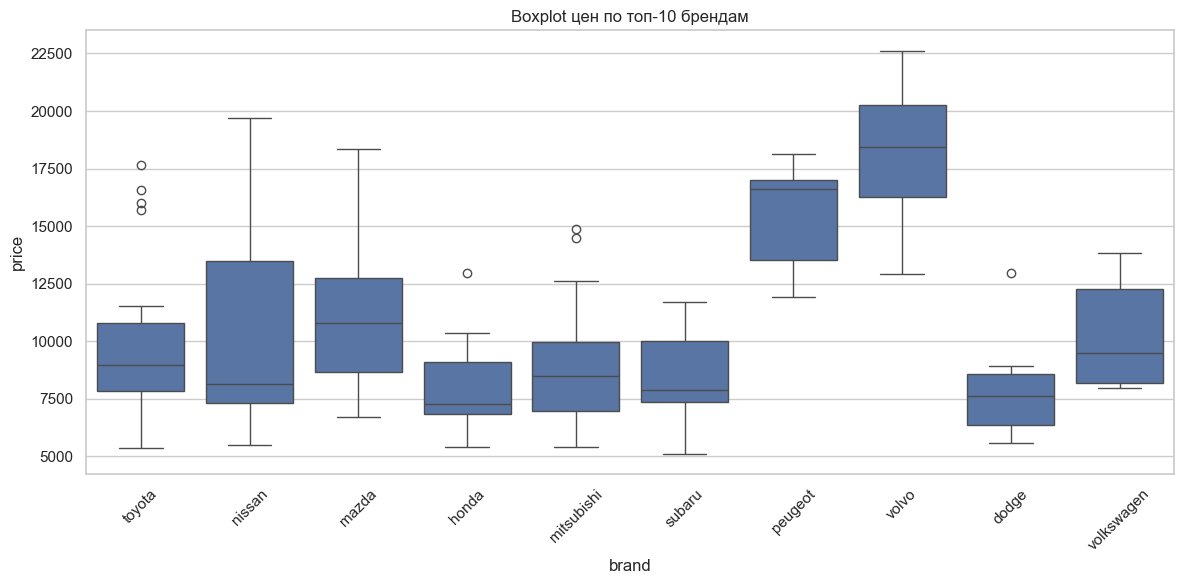

In [63]:
# Ячейка: Топ брендов — средняя цена и boxplot
if 'data' in globals():
    if 'brand' in data.columns:
        top_brands = data['brand'].value_counts().head(10).index.tolist()
        df_top = data[data['brand'].isin(top_brands)]

        plt.figure(figsize=(10,5))
        sns.barplot(data=df_top, x='brand', y='price', estimator=np.mean, order=top_brands)
        plt.xticks(rotation=45)
        plt.title('Средняя цена по топ-10 брендам')
        plt.tight_layout()
        plt.savefig(os.path.join(fig_dir, 'mean_price_top_brands.png'), dpi=150)
        plt.show()

        plt.figure(figsize=(12,6))
        sns.boxplot(data=df_top, x='brand', y='price', order=top_brands)
        plt.xticks(rotation=45)
        plt.title('Boxplot цен по топ-10 брендам')
        plt.tight_layout()
        plt.savefig(os.path.join(fig_dir, 'boxplot_price_top_brands.png'), dpi=150)
        plt.show()
    else:
        print('Нет столбца brand — выполните предобработку')
else:
    print('Данные не подготовлены')

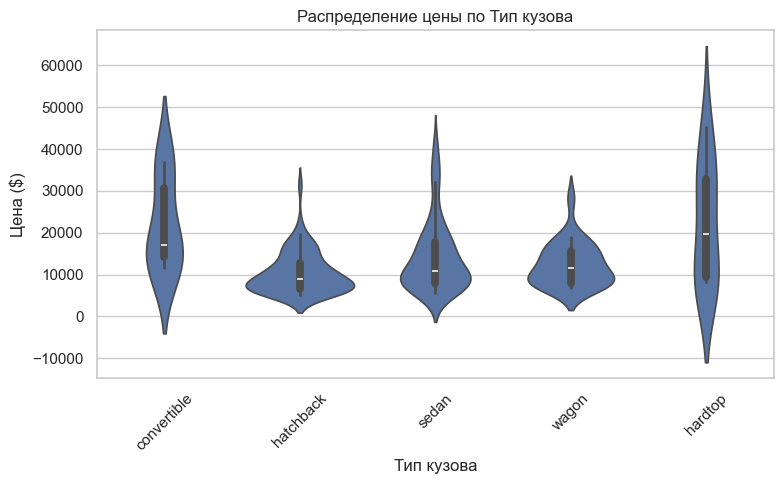

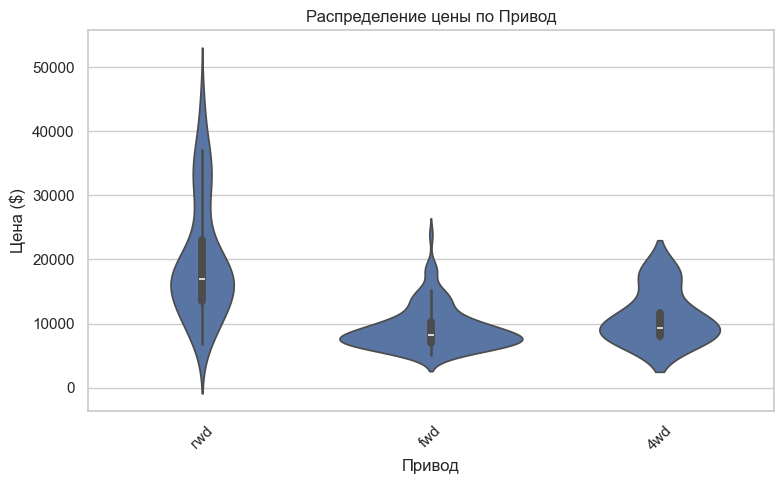

In [64]:
# Ячейка: Доп. графики — violin и box для категорий
if 'data' in globals():
    for col in ['carbody','drivewheel']:
        if col in data.columns:
            plt.figure(figsize=(8,5))
            sns.violinplot(data=data, x=col, y='price')
            col_ru = {'carbody': 'Тип кузова', 'drivewheel': 'Привод'}
            plt.xlabel(col_ru.get(col, col))
            plt.ylabel('Цена ($)')
            plt.title(f'Распределение цены по {col_ru.get(col, col)}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            fp = os.path.join(fig_dir, f'violin_price_by_{col}.png')
            plt.savefig(fp, dpi=150)
            plt.show()
else:
    print('Данные не подготовлены')

,feature,importance
0,num__enginesize,0.543851
1,num__curbweight,0.297284
2,num__highwaympg,0.046786
3,num__horsepower,0.038716
4,num__carwidth,0.015263
5,num__carlength,0.008030
6,num__citympg,0.007766
7,cat__brand_bmw,0.007607
8,num__wheelbase,0.007174
9,num__peakrpm,0.006387


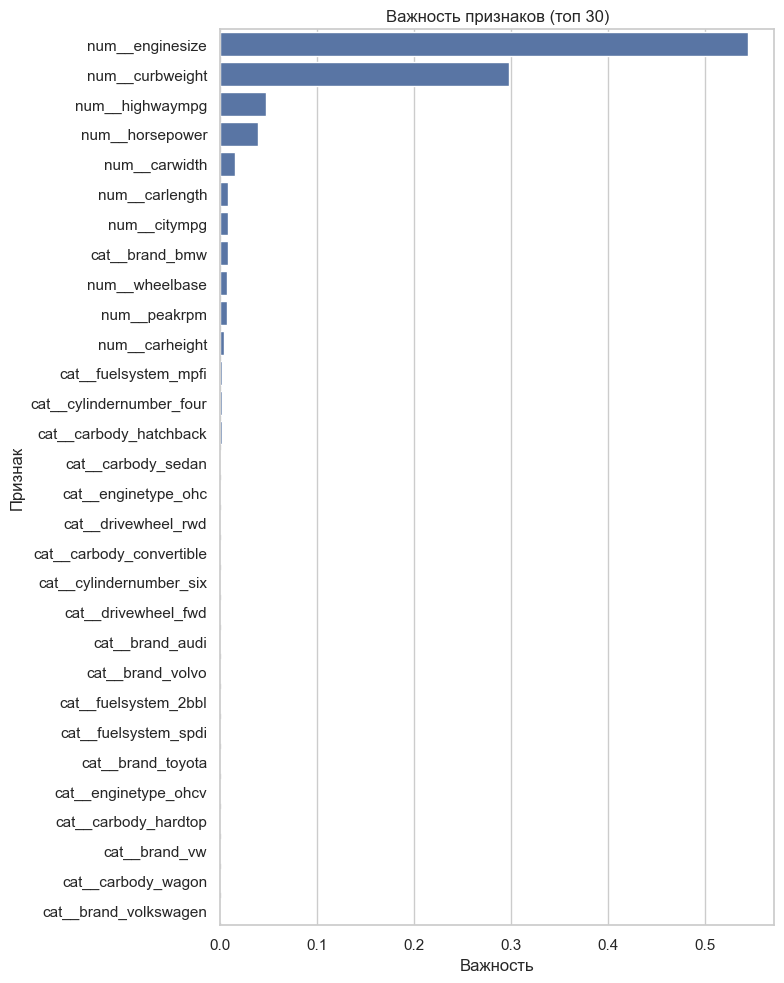

In [65]:
# Ячейка: Важности признаков из обученной модели (если доступно)
if 'pipe' in globals():
    try:
        pre = pipe.named_steps['preproc']
        mdl = pipe.named_steps['model']
        # попытаемся получить имена признаков (sklearn >=1.0)
        try:
            feat_names = pre.get_feature_names_out()
        except Exception:
            # составим вручную: числовые + onehot names если возможно
            num_feats_local = pre.transformers_[0][2]
            cat_transformer = pre.transformers_[1][1]
            cat_feats_local = pre.transformers_[1][2]
            try:
                onehot = cat_transformer.named_steps['onehot'] if hasattr(cat_transformer, 'named_steps') else cat_transformer
                o_names = onehot.get_feature_names_out(cat_feats_local)
                feat_names = list(num_feats_local) + list(o_names)
            except Exception:
                feat_names = list(num_feats_local) + list(cat_feats_local)

        importances = mdl.feature_importances_
        imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
        imp_df = imp_df.sort_values('importance', ascending=False).reset_index(drop=True)
        display(imp_df.head(30))

        plt.figure(figsize=(8,10))
        sns.barplot(x='importance', y='feature', data=imp_df.head(30))
        plt.xlabel('Важность')
        plt.ylabel('Признак')
        plt.title('Важность признаков (топ 30)')
        plt.tight_layout()
        plt.savefig(os.path.join(fig_dir, 'feature_importances.png'), dpi=150)
        plt.show()
    except Exception as e:
        print('Не удалось получить важности признаков:', e)

else:    print('Модель не найдена — обучите модель сначала')

In [ ]:
cd "C:\Users\User\OneDrive\Desktop\project"
git remote add origin https://github.com/ТВА_ИМЯ/car-price-prediction.git
git branch -M main
git push -u origin main